In [1]:
from estimark.agents import BequestWarmGlowLifeCyclePortfolioType
import estimark.calibration.estimation_parameters as parameters
import numpy as np
from HARK.utilities import plot_funcs
import matplotlib.pyplot as plt

***NOTE: using a 'quick fix' for an attribute error. See 'Error Notes' in EstimationParameter.py for further discussion.***


In [2]:
DiscFacAdj, CRRA = np.genfromtxt(
    "tables/WarmGlowPortfolio_estimate_results.csv", skip_header=1, delimiter=","
)

In [3]:
portfolio_agent = BequestWarmGlowLifeCyclePortfolioType(
    **parameters.init_consumer_objects
)

portfolio_agent.CRRA = CRRA
portfolio_agent.DiscFac = [b * DiscFacAdj for b in parameters.DiscFac_timevary]

In [4]:
portfolio_agent.solve()

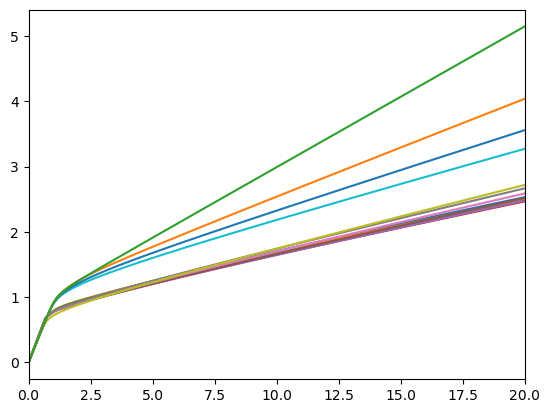

<Figure size 640x480 with 0 Axes>

In [5]:
plot_funcs([sol.cFunc for sol in portfolio_agent.solution[:-1:5]], 0, 20)
plt.savefig("../content/figures/WarmGlowIndShockPortfolio_cFunc.png")

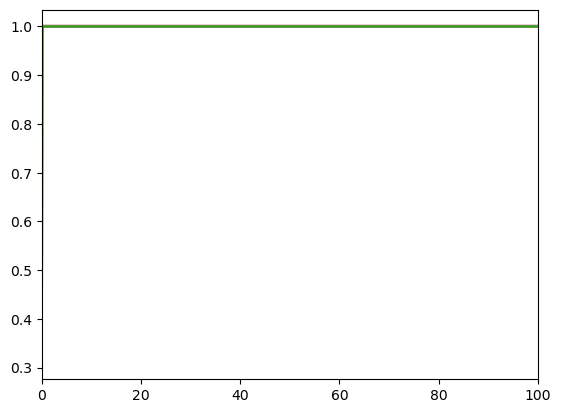

<Figure size 640x480 with 0 Axes>

In [6]:
plot_funcs([sol.ShareFuncAdj for sol in portfolio_agent.solution[:-1:5]], 0, 100)
plt.savefig("../content/figures/WarmGlowIndShockPortfolio_ShareFunc.png")

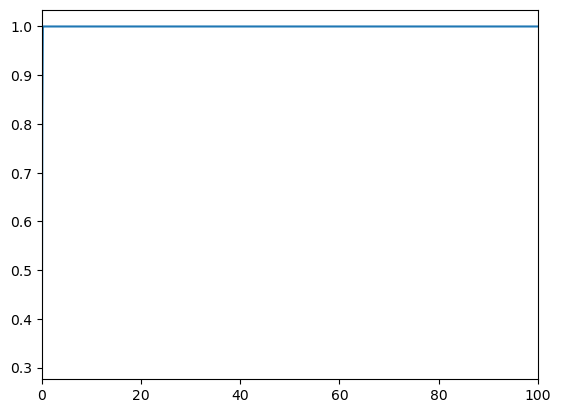

In [7]:
plot_funcs(portfolio_agent.solution[-2].ShareFuncAdj, 0, 100)